# Анализ критериев для успеха игры (Game Success Analysis)

## Описание проекта

Имеются данные о продажах игр до 2016 года, оценки пользователей и экспертов, жанры и платформы.
Необходимо спрогнозировать продажи на следующий год.

**Цель работы:** проанализировать данные и выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Задачи проекта:** для достижения поставленной цели необходимо посчитать суммарные продажи во всех регионах, посмотреть, как менялись продажи по платформам, выбрать самые популярные платформы и жанры игр.

**План работы:**

* Изучить общую информацию о данных;
* Подготовить и обработать данные;
* Провести исследовательский анализ данных;
* Составить портрет пользователя каждого региона;
* Проверить гипотезы;
* Сделать выводы.

## Изучение общей информации

### Общая информация о данных

Импортируем библиотеки, которые понадобятся для анализа данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Загрузим данные и получим информацию о данных. Создадим функцию `df_read_csv`, которая выведит сообщение об ошибке, если информация о файле будет указана неверно

In [2]:
def df_read_csv(path):
    try:
        return pd.read_csv(path)
    except Exception:
        print('Ошибка при загрузке файла')
df = pd.read_csv('games.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведим список характерных значений для каждого столбца.

In [3]:
df.describe() # список характерных значений

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Создадим функцию `describe_cols`, которая выведит список уникальных значений и их количество в каждом столбце и применим для таблицы `df`.

In [4]:
# функция для вывода списка и количества уникальных значений в таблице
def describe_cols(df):
    values = pd.DataFrame()
    for col in df.columns:
        values[col] = [df[col].unique(),df[col].nunique()]
    return values.transpose().sort_values(by = 1, ascending = True).rename({0: 'Значения', 1: 'Количество уникальных значений'}, axis = 1)
describe_cols(df) # применение функции для таблицы 

,Значения,Количество уникальных значений
Rating,"[E, nan, M, T, E10+, K-A, AO, EC, RP]",8
Genre,"[Sports, Platform, Racing, Role-Playing, Puzzl...",12
Platform,"[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ...",31
Year_of_Release,"[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989....",37
Critic_Score,"[76.0, nan, 82.0, 80.0, 89.0, 58.0, 87.0, 91.0...",82
User_Score,"[8, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7....",96
Other_sales,"[8.45, 0.77, 3.29, 2.95, 1.0, 0.58, 2.88, 2.84...",155
JP_sales,"[3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.5, 2.9...",244
EU_sales,"[28.96, 3.58, 12.76, 10.93, 8.89, 2.26, 9.14, ...",307
NA_sales,"[41.36, 29.08, 15.68, 15.61, 11.27, 23.2, 11.2...",402


Проверим количество пустых значений в столбцах.

In [5]:
df.isna().sum() # количество пропусков в столбцах

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Python показывает пустые значения только, если оно имеет тип `NoneType`. Необходимо проверить, есть ли другие пропуски в столбцах. Для этого создадим функцию `nan_values`.

In [6]:
# функция для вывода списка и количества уникальных значений в таблице
def nan_values(df,list_nans = ['',' ','""', '" "', None, np.nan]):
    list_count = []
    list_share = []
    for col in df.columns:
        list_count.append(sum(df[col].isin(list_nans)))
        list_share.append(round(sum(df[col].isin(list_nans)) * 100 / len(df), 2))
    missing_value_df = pd.DataFrame({'column_name': df.columns, 'num_missing': list_count, 'percent_missing': list_share})
    return missing_value_df
nan_values(df) # применение функции для таблицы 

,column_name,num_missing,percent_missing
0,Name,2,0.01
1,Platform,0,0.00
2,Year_of_Release,269,1.61
3,Genre,2,0.01
4,NA_sales,0,0.00
5,EU_sales,0,0.00
6,JP_sales,0,0.00
7,Other_sales,0,0.00
8,Critic_Score,8578,51.32
9,User_Score,6701,40.09


Видим, что количество пропусков осталось таким же, т.е. все пропуски имеют тип `NoneType`.

В таблице 11 столбцов. Типы данных в столбцах разные — `object`, `float`.

Согласно документации к данным:
* `Name` — название игры,
* `Platform` — платформа,
* `Year_of_Release` — год выпуска,
* `Genre` — жанр игры,
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий),
* `EU_sales` — продажи в Европе (миллионы проданных копий),
* `JP_sales` — продажи в Японии (миллионы проданных копий),
* `Other_sales` — продажи в других странах (миллионы проданных копий),
* `Critic_Score` — оценка критиков (максимум 100),
* `User_Score` — оценка пользователей (максимум 10),
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию,

### Вывод

В каждой строке таблицы — данные об игре и ее продажах. В данных встречаются пропуски, а также другие аномалии.
Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка и подготовка данных

### Поиск дубликатов и преобразование названий столбцов

Проверим наличие явных дубликатов в данных.

In [7]:
df.duplicated().sum() # всего явных дубликатов

0

Явных дубликатов в данных нет.

Приведем названия столбцов к нижнему регистру

In [8]:
df.columns = df.columns.str.lower() # приведение столбцов к нижнему регистру

Выведим список уникальных значений в столбце `user_score`.

In [9]:
df['user_score'].value_counts() # количество уникальных значений в столбце 

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Заметим, что в 2424 строках встречается значение `tbd`. Эти значение подлежат уточнению. В нашем случае это оценки пользователей, которые нам неизвестны. Т.к. мы имеем множество пустых значений в этом столбце, заменим `tbd` на `None`.

In [10]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = None # замена значений на None
df.isna().sum() # количество пропусков в столбцах

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Видим, что количество пропущенных значений увеличилось.

### Изменение типов данных

Тип данных в столбце `year_of_release` поменяем со строки на целочисленный, т.к. это год выпуска и он может быть записан только целым числом. Тип данных в столбце `user_score`поменяем со строки на вещественный, т.к. здесь записаны оценки пользователей вещественными числами.

In [11]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = df['user_score'].astype('float')

### Обработка пропусков

Посмотрим, в каких столбцах есть пропуски.

In [12]:
df.isna().sum() # количество пропусков в столбцах

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Выведим строки с пропущенными значениями в столбце `name`

In [13]:
df[df['name'].isna()].head() # вывод строк с пропусками в name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Их всего 2. Удалим эти строки, т.к. мы не можем заполнить корректно данные пропуски и удаление незначительно повлияет на дальнейший анализ и выводы. 

In [14]:
df = df.dropna(subset=['name']) # удаление пропущенных строк, где name пропущено

Пропуски в столбце `year_of_release` корректно заполнить не получится, т.к. мы точно не знаем когда была выпущена игра на конкретной платформе.

Пропуски в столбцах `critic_score`, `user_score`, `rating` заполнить медианными или средними значениями по платформе, году или жанру некорректно, т.к. количество пропусков высокое. Удаление же этих строк значительно повлияет на дальнейший анализ. Оставим их нетронутыми. Возникновение этих пропусков может быть связано с тем, что данные в таблицу заносили из разных источников, где этих показателей не было.

### Создание словаря с расшифровкой

Создадим отдельный словарь, где расшифруем аббревиатуры возрастного рейтинга для игр. При этом рейтинг `K-A` - это старое обозначение для рейтинга `E`. Проведем соответствующую замену.

In [15]:
df['rating'].value_counts() # количество уникальных значений в столбце 

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [16]:
df.loc[df['rating'] == 'K-A'] # вывод строк по условию rating = K-A

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A
903,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


In [17]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E' # замена значений на E
df_esrb = df[['rating']] # создание нового датафрейма
df_esrb = df_esrb.dropna(subset=['rating']) # удаление пропущенных строк, где rating пропущено
df_esrb = df_esrb.drop_duplicates().reset_index(drop = True) # удаление дубликатов и создание новых индексов
df_esrb['decoding'] = ['Для всех','Для взрослых', 'Подросткам', 'Для всех от 10 лет и старше', 'Только для взрослых', 'Для детей младшего возраста', 'Рейтинг ожидается']
df_esrb.head(10)

,rating,decoding
0,E,Для всех
1,M,Для взрослых
2,T,Подросткам
3,E10+,Для всех от 10 лет и старше
4,AO,Только для взрослых
5,EC,Для детей младшего возраста
6,RP,Рейтинг ожидается


### Создание столбца с суммарными продажами

Создадим столбец с суммарными продажами по всем регионам.

In [18]:
df['sum_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) # создание нового столбца
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Вывод

В этом разделе мы подготовили данные для дальнейшего анализа.

В данных не было обнаружено явных дубликатов, названия столбцов привели к нижнему регистру, изменили тип данных в столбцах `year_of_release` и `user_score` на целый и вещественный, соответственно, создали словарь с расшифровкой возрастного рейтинга в столбце `rating`, а также обработали пропущенные значения, где возможно.

## Исследовательский анализ данных

### Выбор актуального периода данных

Построим гистограмму распределения выпущенных игр по годам. 

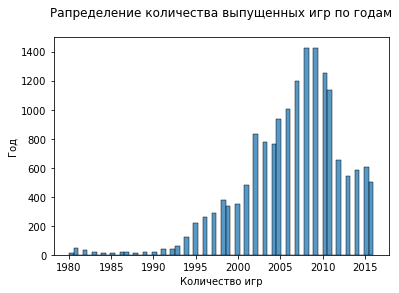

In [19]:
# построение гистограммы
sns.histplot(data = df, x = 'year_of_release')
plt.title('Рапределение количества выпущенных игр по годам' + "\n")
plt.xlabel('Количество игр')
plt.ylabel('Год');

Из графика видно, что до 1995 года игры выпускавлись в малом количестве.

Построим график распределения суммарных продаж игр по каждой платформе за каждый год.

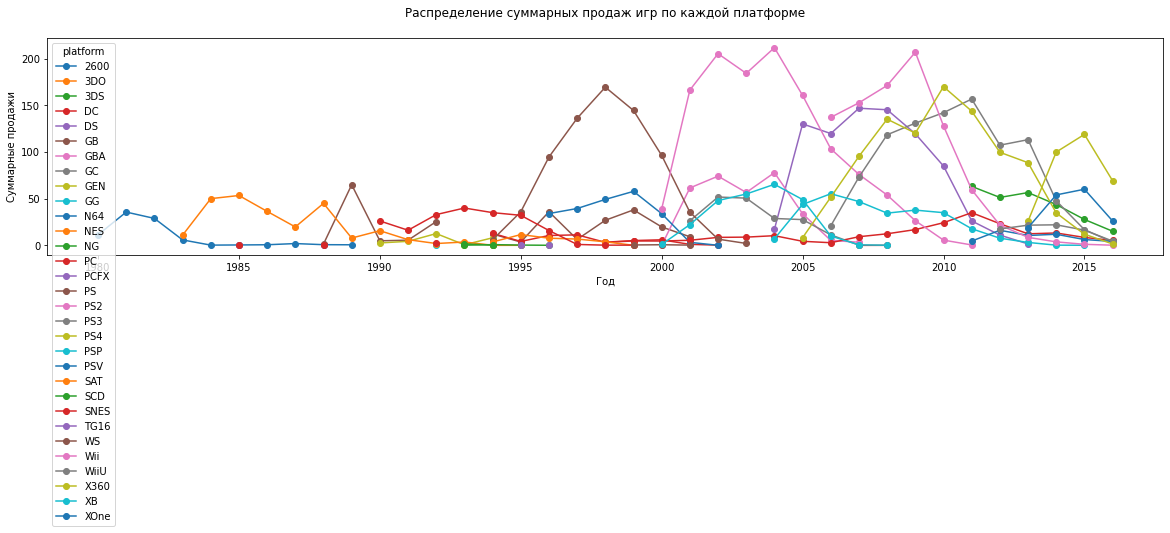

In [20]:
# построение графика
df.groupby(['platform', 'year_of_release'])['sum_sales'].sum().unstack('platform').plot(kind='line', figsize=(20,4),  style = 'o-')
plt.title('Распределение суммарных продаж игр по каждой платформе' + "\n")
plt.xlabel('Год')
plt.ylabel('Суммарные продажи');

Из этого графика видно срок жизни платформы, т.е. сколько лет на ней выпускаются и продаются игры. Изучив график, можно сказать, что характерный срок жизни платформы - 10 лет.

Рассчитаем суммарные продажи по платформам за весь период.

In [21]:
# суммарные продажи по платформам 
sum_sales_platform = df.groupby(['platform'])['sum_sales'].sum().sort_values(ascending = False)
sum_sales_platform

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

Выберим 5 самых продаваемых платформ и построим график распределения выпущенных игр.

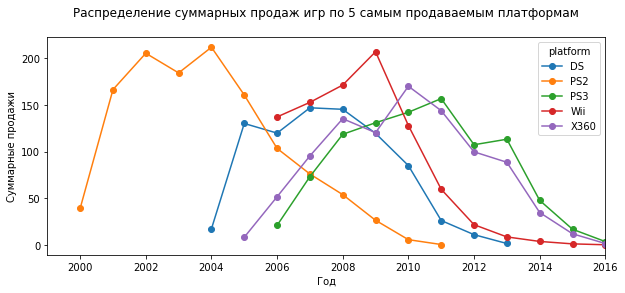

In [22]:
# построение графика
sum_sales_platform = sum_sales_platform.head() 
sum_sales_platform_top_5 = df[df['platform'].isin(sum_sales_platform.index)] # срез строк 
sum_sales_platform_top_5.groupby(['platform', 'year_of_release'])['sum_sales'].sum().unstack('platform').plot(kind='line', figsize=(10,4),  style = 'o-')
plt.xlim([1999, 2016])
plt.title('Распределение суммарных продаж игр по 5 самым продаваемым платформам' + "\n")
plt.xlabel('Год')
plt.ylabel('Суммарные продажи');

Средний цикл жизни платформы 10 лет, но выбирать такой долгий период нецелесообразно, возьмем меньший, а именно 3 года.

In [23]:
df_2014 = df[df['year_of_release'].isin([2014, 2015, 2016])] # срез строк 

Далее будем работать с этим датасетом.

### Анализ данных из актуального периода

Построим график распределения суммарных продаж игр по каждой платформе с 2014 года.

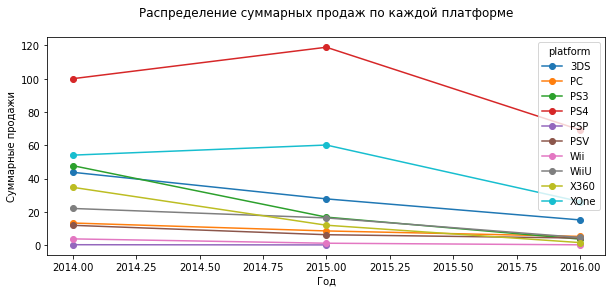

In [24]:
# построение графика
df_2014.groupby(['platform', 'year_of_release'])['sum_sales'].sum().unstack('platform').plot(kind='line', figsize=(10,4),  style = 'o-')
plt.title('Распределение суммарных продаж по каждой платформе' + "\n")
plt.xlabel('Год')
plt.ylabel('Суммарные продажи');

Видно, что продажи на болшинстве платформ падают. Потенциально прибыльными платформами можно считать PS4, PC, XOne. У этих платформ есть падение, но присутствует потенциал для дальнейшего роста, т.к. возможный пик еще не пройден. Назовем новый датасет `df_2014_top_platform`.

In [25]:
df_2014_top_platform = df_2014[df_2014['platform'].isin(['PC', 'XOne', 'PS4'])] # срез строк 

Построим диаграмму размаха для PS4, PC, XOne с суммарными продажами.

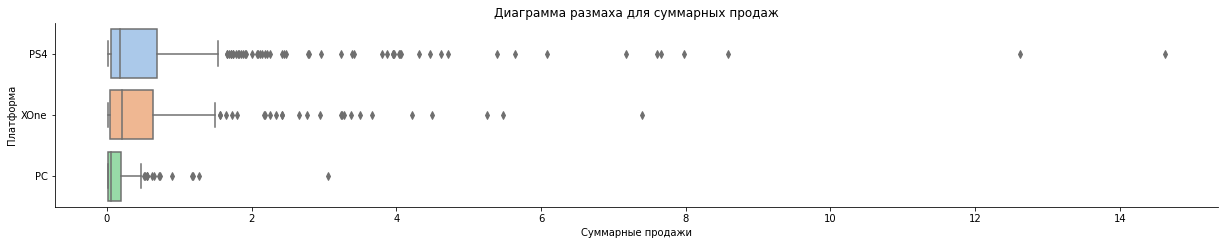

In [26]:
# построение диаграммы размаха
g = sns.catplot(y='platform', x='sum_sales', kind="box", data=df_2014_top_platform, orient='h', palette = 'pastel')
g.fig.set_figwidth(20)
g.fig.set_figheight(3)
plt.title('Диаграмма размаха для суммарных продаж')
plt.xlabel('Суммарные продажи')
plt.ylabel('Платформа');

Выведим список характерных значений суммарных продаж для каждой платформы.

In [27]:
df_2014_top_platform.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = ['mean', 'median', 'std', 'var']).transpose()

,platform,PC,PS4,XOne
mean,sum_sales,0.179139,0.766356,0.615614
median,sum_sales,0.060000,0.185000,0.205000
std,sum_sales,0.329359,1.614969,1.046513
var,sum_sales,0.108477,2.608124,1.095189


Из диаграммы и списка характерных значений видно, что количество выбросов и их значения большие. Из-за этого медиана и среднее отличаются. Разброс значений у PS4 самый высокий, т.к. есть очень высокие значения выбросов.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

Выберим платформу PS4.

In [28]:
df_1 = df_2014_top_platform[df_2014_top_platform['platform'].isin(['PS4'])] # срез строк 

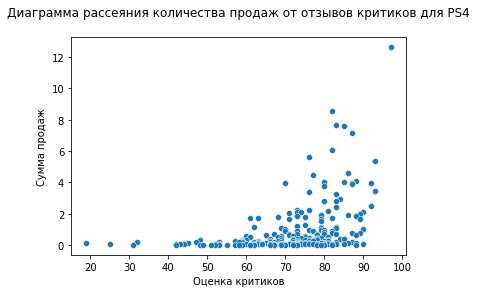

In [29]:
# построение диаграммы рассеяния
sns.scatterplot(data = df_1, x = 'critic_score', y = 'sum_sales')
plt.title('Диаграмма рассеяния количества продаж от отзывов критиков для PS4' + "\n")
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж');

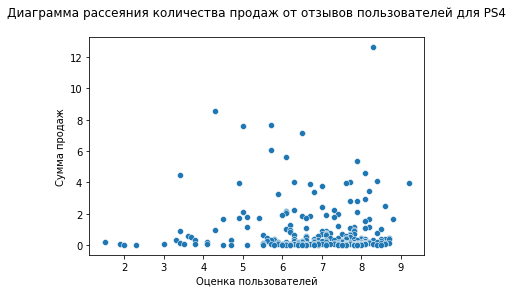

In [30]:
# построение диаграммы рассеяния
sns.scatterplot(data = df_1, x = 'user_score', y = 'sum_sales')
plt.title('Диаграмма рассеяния количества продаж от отзывов пользователей для PS4' + "\n")
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж');

In [31]:
display(df_1[['critic_score','sum_sales']].corr().round(2)) # расчет корреляции между параметрами user_score и sum_sales
df_1[['user_score','sum_sales']].corr().round(2) # расчет корреляции между параметрами user_score и sum_sales

,critic_score,sum_sales
critic_score,1.0,0.4
sum_sales,0.4,1.0


,user_score,sum_sales
user_score,1.00,-0.04
sum_sales,-0.04,1.00


Видим, что корреляция между оценками критиков и суммарными продажами внутри платформы PS4 слабая положительная, а корреляция между оценками пользователей и суммарными продажами внутри очень слабая отрицательная, она практически отсутствует.

Выберим платформу XOne.

In [32]:
df_2 = df_2014_top_platform[df_2014_top_platform['platform'].isin(['XOne'])] # срез строк 

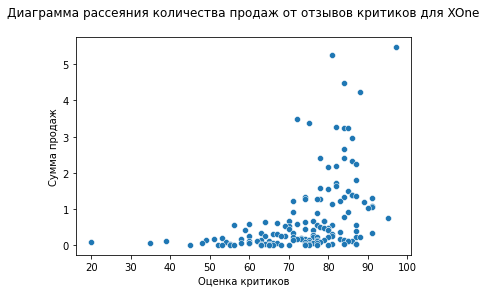

In [33]:
# построение диаграммы рассеяния
sns.scatterplot(data = df_2, x = 'critic_score', y = 'sum_sales')
plt.title('Диаграмма рассеяния количества продаж от отзывов критиков для XOne' + "\n")
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж');

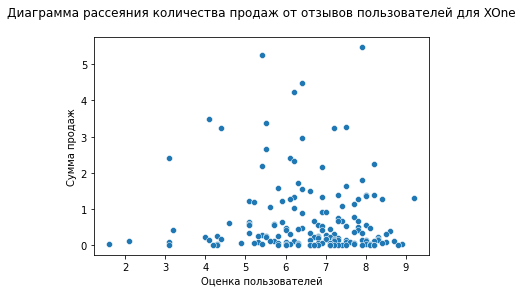

In [34]:
# построение диаграммы рассеяния
sns.scatterplot(data = df_2, x = 'user_score', y = 'sum_sales')
plt.title('Диаграмма рассеяния количества продаж от отзывов пользователей для XOne' + "\n")
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж');

In [35]:
display(df_2[['critic_score','sum_sales']].corr().round(2)) # расчет корреляции между параметрами user_score и sum_sales
df_2[['user_score','sum_sales']].corr().round(2) # расчет корреляции между параметрами user_score и sum_sales

,critic_score,sum_sales
critic_score,1.00,0.43
sum_sales,0.43,1.00


,user_score,sum_sales
user_score,1.00,-0.07
sum_sales,-0.07,1.00


Корреляция между оценками критиков и суммарными продажами внутри платформы XOne слабая положительная, а корреляция между оценками пользователей и суммарными продажами внутри очень слабая отрицательная, практически 0.

Выберим платформу PC.

In [36]:
df_3 = df_2014_top_platform[df_2014_top_platform['platform'].isin(['PC'])] # срез строк 

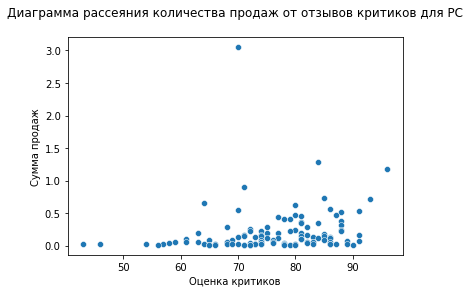

In [37]:
# построение диаграммы рассеяния
sns.scatterplot(data = df_3, x = 'critic_score', y = 'sum_sales')
plt.title('Диаграмма рассеяния количества продаж от отзывов критиков для PC' + "\n")
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж');

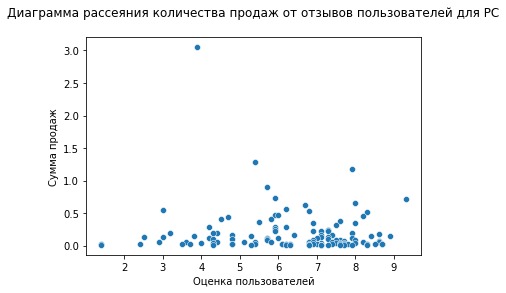

In [38]:
# построение диаграммы рассеяния
sns.scatterplot(data = df_3, x = 'user_score', y = 'sum_sales')
plt.title('Диаграмма рассеяния количества продаж от отзывов пользователей для PC' + "\n")
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж');

In [39]:
display(df_3[['critic_score','sum_sales']].corr().round(2)) # расчет корреляции между параметрами user_score и sum_sales
df_3[['user_score','sum_sales']].corr().round(2) # расчет корреляции между параметрами user_score и sum_sales

,critic_score,sum_sales
critic_score,1.00,0.17
sum_sales,0.17,1.00


,user_score,sum_sales
user_score,1.00,-0.07
sum_sales,-0.07,1.00


Корреляция между оценками критиков и суммарными продажами внутри платформы PC слабая положительная, а корреляция между оценками пользователей и суммарными продажами внутри очень слабая отрицательная, практически отсутствует.

Выводы относительно влияния на продажи внутри одной платформы оценок пользователей и критиков совпадают для выбранных 3 популярных платформ. Влияние оценок пользователей практически отсутствует, а влияние оценок критиков слабое, но положительное. Это вполне логично, т.к. пользователи не являются профессионалами, их мнение редко влияет на продажи, а к мнению критиков прислушиваются и ориентируются при покупке игр.

Посмотрим, как распределены выпущенные игры по жанрам.

genre
Action          262
Shooter          95
Sports           87
Role-Playing     83
Adventure        50
Racing           49
Misc             39
Simulation       27
Fighting         24
Strategy         24
Platform         14
Puzzle            1
Name: genre, dtype: int64


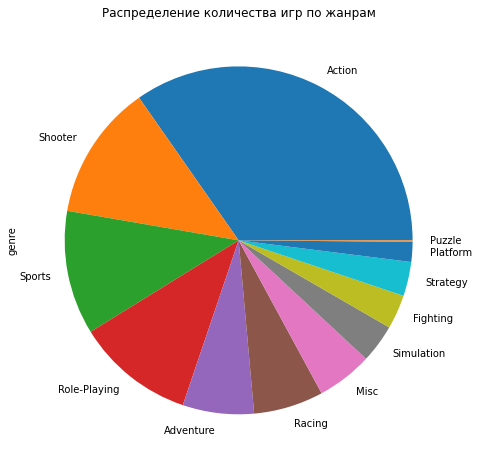

In [40]:
df_genre_size = df_2014_top_platform.groupby(['genre'])['genre'].count().sort_values(ascending = False) # группировка данных по genre 
print(df_genre_size)
# построение круговой диаграммы
df_genre_size.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Распределение количества игр по жанрам');

Наибольшее количество игр выпущено в жанре Action, минимальное Puzzle.

Посмотрим, как распределены суммарные продажи игр по жанрам.

genre
Shooter         139.64
Action          128.02
Sports           74.62
Role-Playing     44.41
Racing           17.69
Misc             14.56
Fighting         10.00
Adventure         9.41
Simulation        8.15
Platform          6.10
Strategy          2.94
Puzzle            0.02
Name: sum_sales, dtype: float64


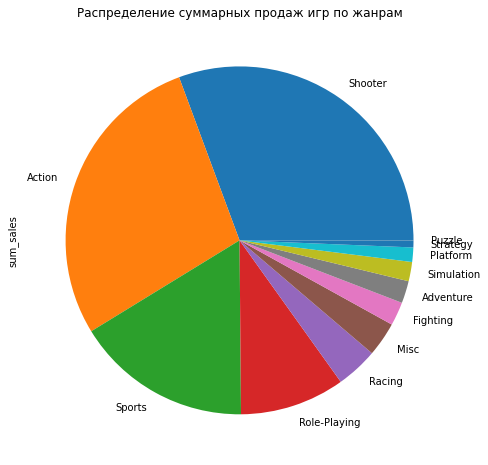

In [41]:
df_genre = df_2014_top_platform.groupby(['genre'])['sum_sales'].sum().sort_values(ascending = False) # группировка данных по genre 
print(df_genre)
# построение круговой диаграммы
df_genre.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Распределение суммарных продаж игр по жанрам');

Наибольшие продажи в жанрах Shooter и Action, а минимальные в жанре Puzzle, причем с явным отставанием.

Стоит отметить, что в жанре Shooter выпущено в 3 раза меньше игр, но суммарные продажи выше чем у Action.

### Вывод

В этом раздел мы выбрали актуальный период. Он получился с 2014 года по 2016. Этот период был выбран исходя из рассмотрения  среднего жизненого цикла одной платфоры, но также учтено, что рассматривать данные за такой длительный срок нецелесообразно. Поэтому мы сократили период до 3 лет.

Проанализировав этот период мы выбрали потенциально прибыльные платформы. Ими оказались PC, PS4, XOne. 

Мы выяснили, что корреляции между отзывами пользователей и суммарными продажами по каждой платформе практически нет, а между отзывами критиков и продажами есть, слабая положительная.

Наибольшие продажи в жанрах Shooter и Action, а наименьшие в жанре Puzzle.

## Составление портрета пользователя каждого региона

### Самые популярные платформы

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы, т.е. сколько продано копий игр для каждой платформы.

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
WiiU    19.36
PC       7.23
PSV      2.52
Wii      2.08
PSP      0.00
Name: na_sales, dtype: float64


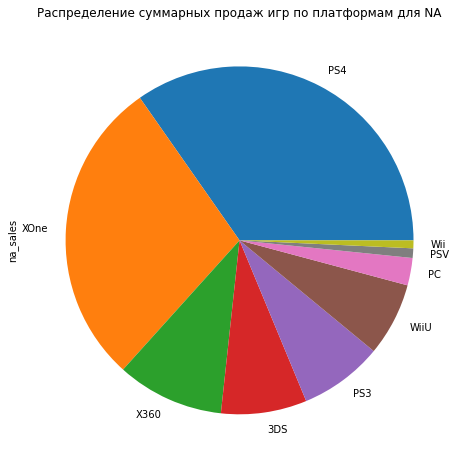

In [42]:
df_platform_na = df_2014.groupby(['platform'])['na_sales'].sum().sort_values(ascending = False)
print(df_platform_na)
df_platform_na.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Распределение суммарных продаж игр по платформам для NA');

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
X360     15.49
WiiU     13.15
PSV       3.53
Wii       2.59
PSP       0.00
Name: eu_sales, dtype: float64


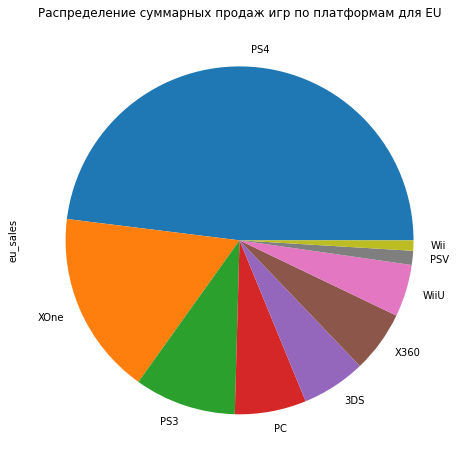

In [43]:
df_platform_eu = df_2014.groupby(['platform'])['eu_sales'].sum().sort_values(ascending = False)
print(df_platform_eu)
df_platform_eu.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Распределение суммарных продаж игр по платформам для EU');

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
PSP      0.36
XOne     0.32
X360     0.08
PC       0.00
Wii      0.00
Name: jp_sales, dtype: float64


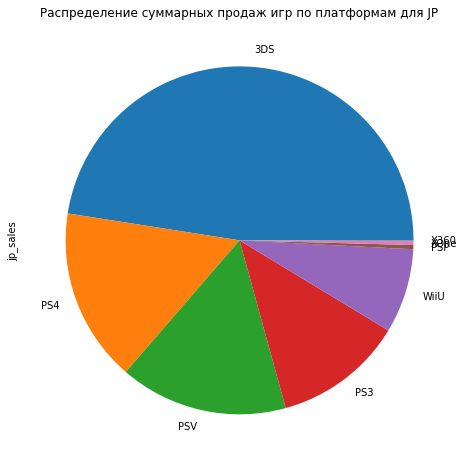

In [44]:
df_platform_jp = df_2014.groupby(['platform'])['jp_sales'].sum().sort_values(ascending = False)
print(df_platform_jp)
df_platform_jp.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Распределение суммарных продаж игр по платформам для JP');

Видим, что топ-5 платформ по продажам: 
* NA: PS4 , XOne, X360, 3DS, PS3,
* EU: PS4, XOne, PS3, PC, 3DS,
* JP: 3DS, PS4, PSV, PS3, WiiU.

Можно заметить, что игр в EU и NA игр покупают больше, чем в JP, что очевидно, т.к. в первых двух регионов множество стран, а здесь одна. Также видим, что в EU и NA пользователи используют для игр похожие консоли, в отличии от JP.

### Самые популярные жанры

Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры, т.е. сколько продано копий игр для каждой платформы.

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Fighting        12.43
Racing           8.74
Platform         6.79
Adventure        5.64
Simulation       2.63
Strategy         0.98
Puzzle           0.65
Name: na_sales, dtype: float64


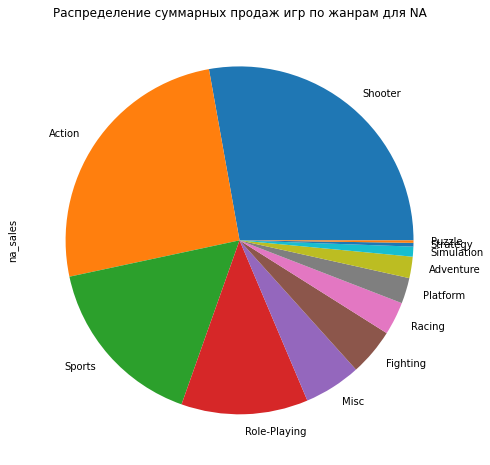

In [45]:
df_genre_na = df_2014.groupby(['genre'])['na_sales'].sum().sort_values(ascending = False)
print(df_genre_na)
df_genre_na.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Распределение суммарных продаж игр по жанрам для NA');

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Misc            12.86
Simulation       7.30
Platform         6.80
Fighting         6.69
Adventure        6.49
Strategy         1.79
Puzzle           0.52
Name: eu_sales, dtype: float64


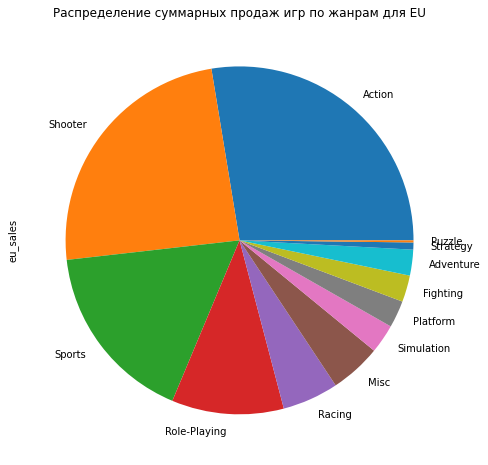

In [46]:
df_genre_eu = df_2014.groupby(['genre'])['eu_sales'].sum().sort_values(ascending = False)
print(df_genre_eu)
df_genre_eu.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Распределение суммарных продаж игр по жанрам для EU');

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Adventure        3.60
Sports           3.26
Platform         2.69
Simulation       2.31
Racing           1.76
Strategy         0.95
Puzzle           0.93
Name: jp_sales, dtype: float64


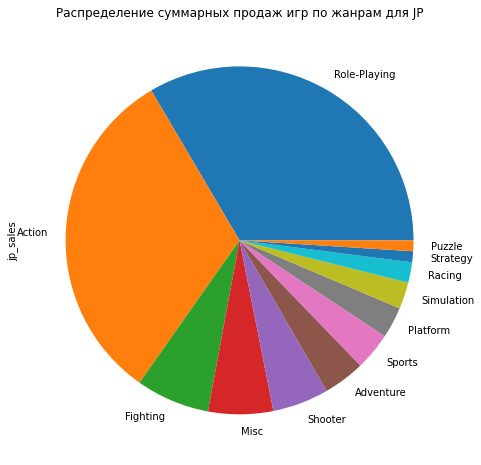

In [47]:
df_genre_jp = df_2014.groupby(['genre'])['jp_sales'].sum().sort_values(ascending = False)
print(df_genre_jp)
df_genre_jp.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Распределение суммарных продаж игр по жанрам для JP');

Видим, что топ-5 жанров по продажам: 
* NA: Shooter, Action, Sports, Role-Playing, Misc,
* EU: Action, Shooter, Sports, Role-Playing, Racing,
* JP: Role-Playing, Action, Fighting, Misc, Shooter.

Заметим, что пользователи регионов NA и EU покупаютигры одного жанра с небольшими различиями. А у JP видим совершенно другого лидера продаж - Role-Playing, но остальные места схожи с 2 другими регионами.

### Влияение рейтинга ESRB на продажи

Определим для каждого региона (NA, EU, JP) влияние рейтинга ESRB на продажи. Заполним пропуски данных значением `unknown`.

rating
M          96.42
unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64


C:\Users\1\AppData\Local\Temp/ipykernel_6396/3367404880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['rating'] = df_2014['rating'].fillna('unknown') # заполнение пропусков в rating


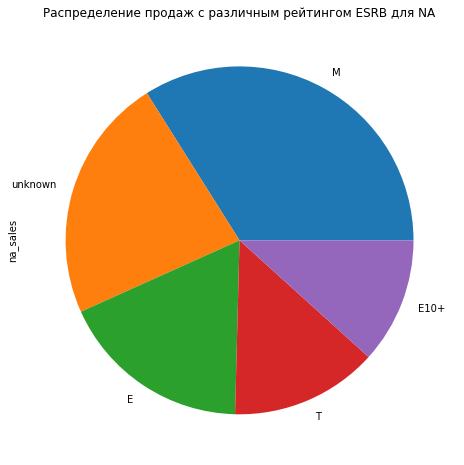

In [48]:
df_2014['rating'] = df_2014['rating'].fillna('unknown') # заполнение пропусков в rating
df_rating_na = df_2014.groupby(['rating'])['na_sales'].sum().sort_values(ascending = False)
print(df_rating_na)
df_rating_na.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Распределение продаж с различным рейтингом ESRB для NA');

# Если появляется предупреждение, выделенное красным цветом, то не стоит на него обращать внимание, 
# в нашем случае всё верно

rating
M          93.44
unknown    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64


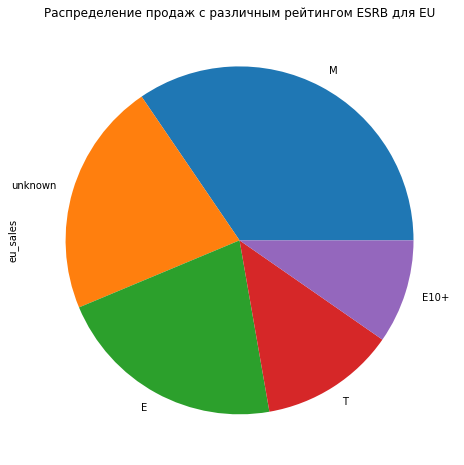

In [49]:
df_rating_eu = df_2014.groupby(['rating'])['eu_sales'].sum().sort_values(ascending = False)
print(df_rating_eu)
df_rating_eu.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Распределение продаж с различным рейтингом ESRB для EU');

rating
unknown    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64


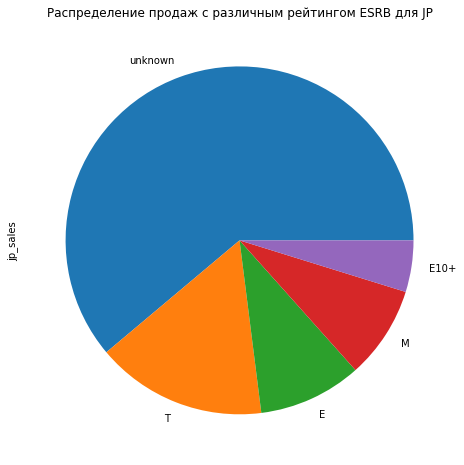

In [50]:
df_rating_jp = df_2014.groupby(['rating'])['jp_sales'].sum().sort_values(ascending = False)
print(df_rating_jp)
df_rating_jp.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Распределение продаж с различным рейтингом ESRB для JP');

In [51]:
df_esrb

,rating,decoding
0,E,Для всех
1,M,Для взрослых
2,T,Подросткам
3,E10+,Для всех от 10 лет и старше
4,AO,Только для взрослых
5,EC,Для детей младшего возраста
6,RP,Рейтинг ожидается


По полученным результатам можно вявить, что у регионов EU, JP, NA наибольшие продажи игр с рейтингом E, T, M, E10+, игра с остальным рейтингом не покупают. Заметим, что пропущенные значения, которые мы заменили на `unknown`, имеют огромную долю, особенно у JP. Эти значения искажают результат, но заменить их на конкретные мы не можем.

### Вывод

В этом разделе мы провели анализ по продажам в разных регионах (NA, EU,JP). Можно сказать, что предпочтения по выбору пользователями платформ и жанров в регионах NA и EU очень похож, а в регионе JP есть различия. Также мы оценили влияние возрастного рейтинга ESRB на суммарные продажи в регионах. Видно, что игры с рейтингом E, T, M, E10+ покупают везде, а с рейтингом AO, EC не покупают. 

## Проверка гипотез

### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевую гипотезу примем, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Тогда альтернативная ей будет: средние пользовательские рейтинги платформ Xbox One и PC различаются. В качестве критерия для проверки выберим гипотезу о равенстве средних двух генеральных совокупностей. Т.к. количество элементов в двух совокупностях различно и нет уверенности в равенстве дисперсий, то параметр примем: `equal_var = False`. Уровень значимости `alpha` зададим 5%.

Выберим срез строк для платформ Xbox One и PC и удалим строки с пропущенными значениями в столбце `user_score`.

In [52]:
df_xone = df_2014[df_2014['platform'].isin(['XOne'])] # срез строк 
df_xone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             228 non-null    object 
 1   platform         228 non-null    object 
 2   year_of_release  228 non-null    Int64  
 3   genre            228 non-null    object 
 4   na_sales         228 non-null    float64
 5   eu_sales         228 non-null    float64
 6   jp_sales         228 non-null    float64
 7   other_sales      228 non-null    float64
 8   critic_score     155 non-null    float64
 9   user_score       165 non-null    float64
 10  rating           228 non-null    object 
 11  sum_sales        228 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 23.4+ KB


In [53]:
df_pc = df_2014[df_2014['platform'].isin(['PC'])] # срез строк 
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             151 non-null    object 
 1   platform         151 non-null    object 
 2   year_of_release  151 non-null    Int64  
 3   genre            151 non-null    object 
 4   na_sales         151 non-null    float64
 5   eu_sales         151 non-null    float64
 6   jp_sales         151 non-null    float64
 7   other_sales      151 non-null    float64
 8   critic_score     116 non-null    float64
 9   user_score       122 non-null    float64
 10  rating           151 non-null    object 
 11  sum_sales        151 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 15.5+ KB


In [54]:
df_pc = df_pc.dropna(subset=['user_score']) # удаление пропущенных строк, где user_score пропущено
df_xone = df_xone.dropna(subset=['user_score']) # удаление пропущенных строк, где user_score пропущено

In [55]:
# проверка гипотезы
alpha = 0.05

results = st.ttest_ind(df_pc['user_score'], df_xone['user_score'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что получить равные средние пользовательские рейтинги платформ Xbox One и PC в рамках этой гипотезы возможно с вероятностью 11 %, что выше заявленного уровня значимости в 5 %. Значит, отвергнуть нулевую гипотезу нельзя.

### Проверка гипотезы: cредние пользовательские рейтинги жанров Action и Sports разные

Нулевую гипотезу примем, что cредние пользовательские рейтинги жанров Action и Sports одинаковые. Тогда альтернативная ей будет: cредние пользовательские рейтинги жанров Action и Sports разные. В качестве критерия для проверки выберим гипотезу о равенстве средних двух генеральных совокупностей. Т.к. количество элементов в двух совокупностях различно и нет уверенности в равенстве дисперсий, то параметр примем: `equal_var = False`. Уровень значимости `alpha` зададим 5%.

Выберим срез строк для жанров Action и Sports и удалим строки с пропущенными значениями в столбце `user_score`.

In [56]:
df_action = df_2014[df_2014['genre'].isin(['Action'])] # срез строк 
df_action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 42 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             619 non-null    object 
 1   platform         619 non-null    object 
 2   year_of_release  619 non-null    Int64  
 3   genre            619 non-null    object 
 4   na_sales         619 non-null    float64
 5   eu_sales         619 non-null    float64
 6   jp_sales         619 non-null    float64
 7   other_sales      619 non-null    float64
 8   critic_score     231 non-null    float64
 9   user_score       297 non-null    float64
 10  rating           619 non-null    object 
 11  sum_sales        619 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 63.5+ KB


In [57]:
df_sports = df_2014[df_2014['genre'].isin(['Sports'])] # срез строк 
df_sports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             161 non-null    object 
 1   platform         161 non-null    object 
 2   year_of_release  161 non-null    Int64  
 3   genre            161 non-null    object 
 4   na_sales         161 non-null    float64
 5   eu_sales         161 non-null    float64
 6   jp_sales         161 non-null    float64
 7   other_sales      161 non-null    float64
 8   critic_score     84 non-null     float64
 9   user_score       127 non-null    float64
 10  rating           161 non-null    object 
 11  sum_sales        161 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 16.5+ KB


In [58]:
df_action = df_action.dropna(subset=['user_score']) # удаление пропущенных строк, где user_score пропущено
df_sports = df_sports.dropna(subset=['user_score']) # удаление пропущенных строк, где user_score пропущено

In [59]:
# проверка гипотезы

alpha = 0.05

results = st.ttest_ind(df_sports['user_score'], df_action['user_score'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что получить равные средние пользовательские рейтинги платформ жанров Action и Sports в рамках этой гипотезы возможно с вероятностью менее 0.1 %, что меньше заявленного уровня значимости в 5 %. Значит, у нас есть основания отвергнуть нулевую гипотезу и принять альтернативную.

### Вывод

Необходимо было проверить следующие гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые и cредние пользовательские рейтинги жанров Action и Sports разные.

В первом анализе выбрали нулевую гипотезу о равенстве рейтингов платформ, p-value оказался выше выбранного уровня значимости, значит гипотезу о равенстве не отвергаем, т.е. средние пользовательские рейтинги платформ Xbox One и PC не различаются.

Во втором анализе выбрали нулевую гипотезу о равенстве рейтингов жанров, p-value оказался меньше выбранного уровня значимости, значит гипотезу о равенстве отвергаем, т.е. cредние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод

В ходе исследования необходимо данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Данные представлены до 2016 года.

1. В данных было найдено небольшое количество пропусков и аномалий, часть из которых были устранены. Пропуски в столбцах `critic_score`, `user_score`, `rating` не были заполнены. Для их заполнения требуется больше данных.
2. Был создан дополнительная таблица-словарь для расшифровки возрастного рейтинга.
3. В данные был внесен дополнительный столбец с суммарными продажами по всем регионам.
3. В ходе исследования было установлено:     
    * до 1995 года продажи были невысокие,
    * средний жизненный цикл платформ - 10 лет, но актуальный период выбран - 3 года, чтобы точнее оценить перспективные платформы,
    * наиболее перспективные платформы: XOne, PS4, PC, 
    * влияние оценок пользователей на суммарные продажи по платформам практически отсутствует, а влияние оценок критиков слабое, но положительное,
    * наибольшие продажи в жанрах Shooter и Action, а минимальные в жанре Puzzle, причем с явным отставанием,
    * предпочтения по выбору пользователями платформ и жанров в регионах NA и EU очень похож, а в регионе JP есть различия. 
    * игры с рейтингом "Для всех", "Подросткам", "Для взрослых", "Для всех от 10 лет и старше" покупают везде, а с рейтингом "Только для взрослых", "Для детей младшего возраста" не покупают. 
    * гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, была подтверждена,
    * гипотеза о том, что cредние пользовательские рейтинги жанров Action и Sports разные, была подтверждена.
